### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()




,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



📊 Facturación total tienda 1: $1,150,880,400.00
📊 Facturación total tienda 2: $1,116,343,500.00
📊 Facturación total tienda 3: $1,098,019,600.00
📊 Facturación total tienda 4: $1,038,375,700.00


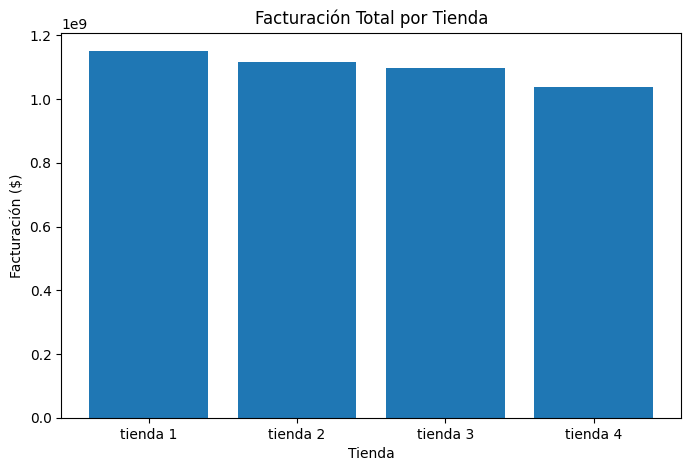

In [ ]:
facturacion_total = {}
for nombre, df in tiendas.items():
    total = df["Precio"].sum() # Assuming 'Precio' is the column for sales
    facturacion_total[nombre] = total
    print(f"📊 Facturación total {nombre}: ${total:,.2f}")

plt.figure(figsize=(8, 5))
plt.bar(facturacion_total.keys(), facturacion_total.values())
plt.title("Facturación Total por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación ($)")
plt.show()

# 2. Ventas por categoría


🏆 Producto más vendido en tienda 1: TV LED UHD 4K ($142,150,200.00)
⚠️ Producto menos vendido en tienda 1: Cuerda para saltar ($652,800.00)

🏆 Producto más vendido en tienda 2: Iphone 15 ($113,225,800.00)
⚠️ Producto menos vendido en tienda 2: Cubo mágico 8x8 ($643,600.00)

🏆 Producto más vendido en tienda 3: Refrigerador ($99,889,700.00)
⚠️ Producto menos vendido en tienda 3: Cubo mágico 8x8 ($640,400.00)

🏆 Producto más vendido en tienda 4: Iphone 15 ($96,697,500.00)
⚠️ Producto menos vendido en tienda 4: Cuerda para saltar ($704,800.00)


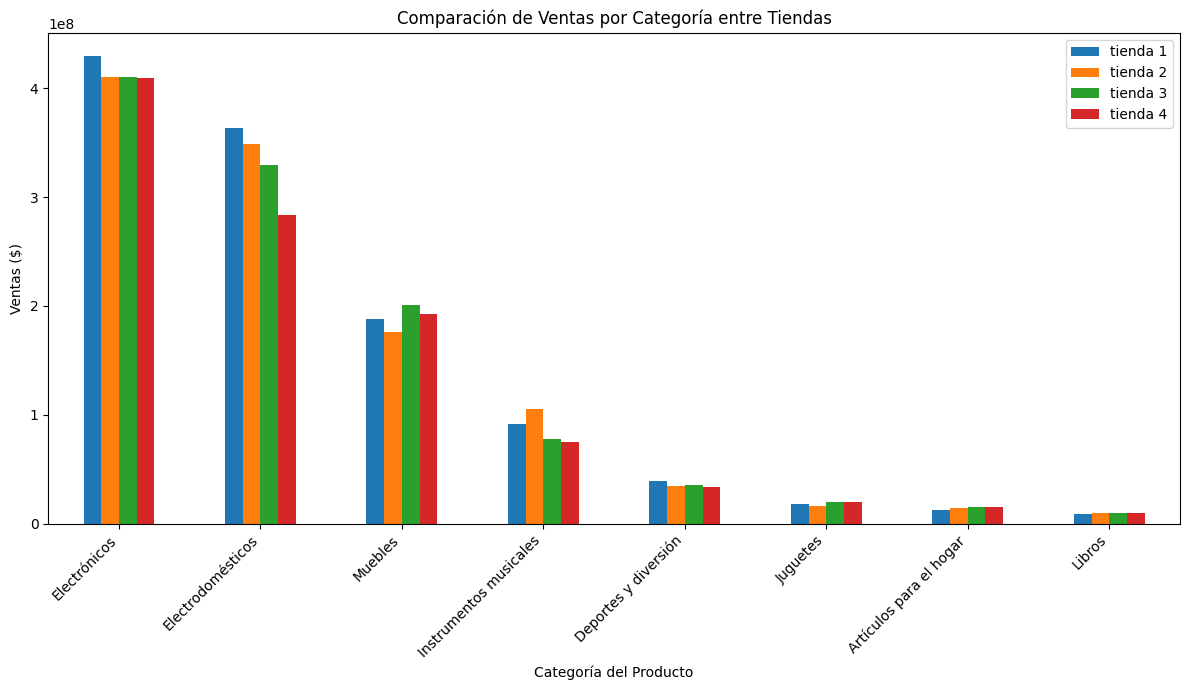

In [ ]:
# Prepare data for plotting - unstack the series in the dictionary
ventas_df = pd.DataFrame(ventas_por_categoria_por_tienda)

# Plotting
ventas_df.plot(kind='bar', figsize=(12, 7))
plt.title("Comparación de Ventas por Categoría entre Tiendas")
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_por_tienda = {}
for nombre, df in tiendas.items():
    calificacion_promedio = df["Calificación"].mean()
    calificacion_por_tienda[nombre] = calificacion_promedio
    print(f"⭐ Calificación promedio {nombre}: {calificacion_promedio:.2f}")

⭐ Calificación promedio tienda 1: 3.98
⭐ Calificación promedio tienda 2: 4.04
⭐ Calificación promedio tienda 3: 4.05
⭐ Calificación promedio tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
for nombre, df in tiendas.items():
    analisis_productos(df, nombre)


🏆 Producto más vendido en tienda 1: TV LED UHD 4K ($142,150,200.00)
⚠️ Producto menos vendido en tienda 1: Cuerda para saltar ($652,800.00)

🏆 Producto más vendido en tienda 2: Iphone 15 ($113,225,800.00)
⚠️ Producto menos vendido en tienda 2: Cubo mágico 8x8 ($643,600.00)

🏆 Producto más vendido en tienda 3: Refrigerador ($99,889,700.00)
⚠️ Producto menos vendido en tienda 3: Cubo mágico 8x8 ($640,400.00)

🏆 Producto más vendido en tienda 4: Iphone 15 ($96,697,500.00)
⚠️ Producto menos vendido en tienda 4: Cuerda para saltar ($704,800.00)


# 5. Envío promedio por tienda

🚚 Costo de envío promedio por tienda:
  tienda 1: $26,018.61
  tienda 2: $25,216.24
  tienda 3: $24,805.68
  tienda 4: $23,459.46


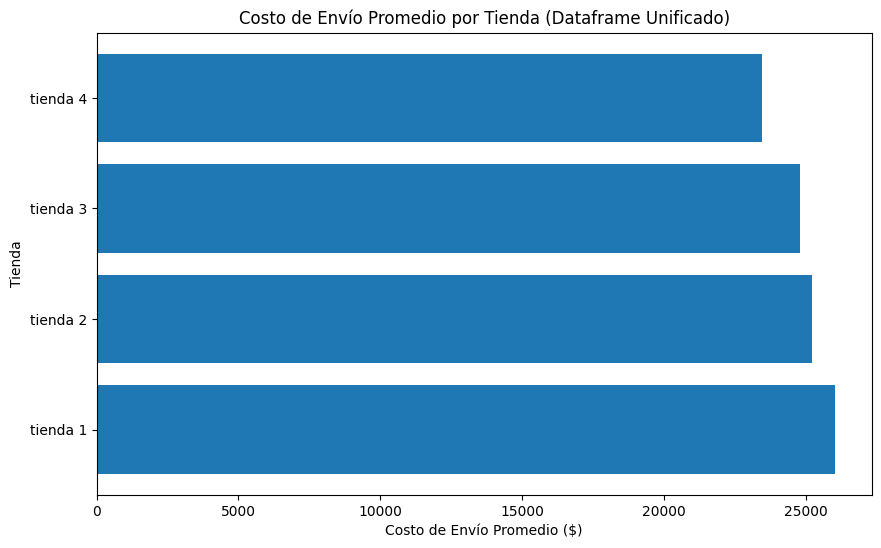

In [ ]:
# Calculate average shipping cost per store using the unified dataframe
envio_promedio_por_tienda_unificado = data.groupby('Tienda')['Costo de envío'].mean()

print("🚚 Costo de envío promedio por tienda:")
for tienda, promedio in envio_promedio_por_tienda_unificado.items():
    print(f"  {tienda}: ${promedio:,.2f}")

# Plotting the average shipping cost per store
plt.figure(figsize=(10, 6))
plt.barh(envio_promedio_por_tienda_unificado.index, envio_promedio_por_tienda_unificado.values)
plt.xlabel("Costo de Envío Promedio ($)")
plt.ylabel("Tienda")
plt.title("Costo de Envío Promedio por Tienda (Dataframe Unificado)")
plt.show()

Una vez analizando los datos anteriores, podemso concluir la tienda mas viable de cerrar es la 4 debido a que aun cuando es la mas barat en envios tiene la menor facturación con productos mas vendios algo mas baratos en comparación a las demas tiendas